In [1]:
from keras.datasets import reuters 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

2023-07-03 01:37:33.338200: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-03 01:37:33.340572: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 01:37:33.406469: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 01:37:33.407116: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 01:37:34.439084: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000):
     results = np.zeros((len(sequences), dimension))
     for i, sequence in enumerate(sequences):
         results[i, sequence] = 1.
     return results 

##### 将训练数据向量化
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data) 

##### one-hot编码
from keras.utils.np_utils import to_categorical 
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

##### 将训练数据分为输入数据和验证数据
x_val = x_train[:1000]
partial_x_train = x_train[1000:] 
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Epoch 1/30
16/16 [==============================] - 1s 28ms/step - loss: 3.0399 - accuracy: 0.5040 - val_loss: 2.4119 - val_accuracy: 0.5820
Epoch 2/30
16/16 [==============================] - 0s 9ms/step - loss: 2.0878 - accuracy: 0.6288 - val_loss: 1.8490 - val_accuracy: 0.6360
Epoch 3/30
16/16 [==============================] - 0s 9ms/step - loss: 1.6330 - accuracy: 0.6830 - val_loss: 1.5545 - val_accuracy: 0.6760
Epoch 4/30
16/16 [==============================] - 0s 10ms/step - loss: 1.3626 - accuracy: 0.7248 - val_loss: 1.3792 - val_accuracy: 0.7040
Epoch 5/30
16/16 [==============================] - 0s 10ms/step - loss: 1.1803 - accuracy: 0.7554 - val_loss: 1.2582 - val_accuracy: 0.7300
Epoch 6/30
16/16 [==============================] - 0s 10ms/step - loss: 1.0449 - accuracy: 0.7833 - val_loss: 1.1795 - val_accuracy: 0.7480
Epoch 7/30
16/16 [==============================] - 0s 10ms/step - loss: 0.9378 - accuracy: 0.8057 - val_loss: 1.1210 - val_accuracy: 0.7630
Epoch 8/30
16/1

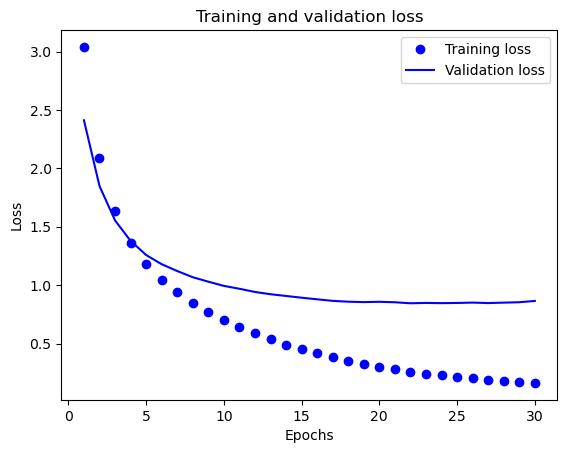

In [3]:
from keras import models
from keras import layers 
model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(partial_x_train,
 partial_y_train,
 epochs=30,
 batch_size=512,
 validation_data=(x_val, y_val))

import matplotlib.pyplot as plt 
loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(1, len(loss) + 1) 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.show()

In [4]:
predictions = model.predict(x_test)
predictions[0].shape
predictions[0]

71/71 [==============================] - 0s 1ms/step


array([7.72657877e-05, 2.02576393e-05, 2.34445849e-07, 9.64885235e-01,
       3.07709575e-02, 4.58156705e-07, 3.89208708e-07, 5.56028817e-06,
       5.33619139e-04, 6.65096422e-07, 4.55523741e-06, 6.41896913e-05,
       4.13909329e-05, 2.06025376e-04, 1.21868425e-05, 8.51673303e-06,
       4.89301347e-05, 2.02587466e-06, 5.50480900e-06, 4.83273296e-04,
       7.14383961e-04, 9.82186903e-05, 1.21147616e-06, 5.01801296e-05,
       9.33804495e-06, 1.42186047e-06, 2.39600922e-06, 3.27018370e-06,
       2.62716026e-06, 4.90638951e-04, 2.50341964e-05, 4.47311904e-05,
       2.81953203e-06, 9.93498998e-06, 5.73642137e-05, 3.36879475e-06,
       1.17380994e-04, 2.62641261e-05, 3.69023638e-07, 1.13969320e-03,
       1.47760011e-06, 4.81523284e-06, 6.29966371e-06, 6.56594375e-06,
       5.89581987e-06, 3.14759336e-06], dtype=float32)